# Numpy

___Горнатенко Даниил, ПИ22-5___

In [ ]:
Материалы:
* Макрушин С.В. "Лекция 1: Библиотека Numpy"
* https://numpy.org/doc/stable/user/index.html
* https://numpy.org/doc/stable/reference/index.html

## Задачи для совместного разбора

1. Сгенерировать двухмерный массив `arr` размерности (4, 7), состоящий из случайных действительных чисел, равномерно распределенных в диапазоне от 0 до 20. Нормализовать значения массива с помощью преобразования вида  $𝑎𝑥+𝑏$  так, что после нормализации максимальный элемент масcива будет равен 1.0, минимальный 0.0

In [1]:
import numpy as np

In [2]:
np.random.randint(0, 20, size = (4, 7))

array([[ 2,  6, 16, 16,  8,  7, 12],
       [ 0,  5,  3,  3,  3, 14,  4],
       [ 4, 12, 15,  7, 16,  5,  1],
       [ 7,  3,  5,  9,  0, 17,  0]])

2. Создать матрицу 8 на 10 из случайных целых (используя модуль `numpy.random`) чисел из диапозона от 0 до 10 и найти в ней строку (ее индекс и вывести саму строку), в которой сумма значений минимальна.

In [3]:
np.random.randint(0, 10, size = (8, 10))

array([[7, 4, 8, 5, 7, 7, 6, 9, 5, 8],
       [0, 6, 0, 3, 3, 8, 5, 0, 0, 3],
       [0, 6, 0, 5, 1, 1, 3, 8, 6, 7],
       [7, 4, 2, 5, 5, 6, 5, 9, 8, 6],
       [1, 6, 2, 0, 6, 6, 7, 9, 5, 1],
       [3, 9, 0, 6, 3, 9, 0, 8, 6, 6],
       [3, 6, 9, 8, 6, 3, 3, 5, 7, 5],
       [9, 3, 8, 2, 7, 9, 3, 5, 8, 2]])

3. Найти евклидово расстояние между двумя одномерными векторами одинаковой размерности.

In [4]:
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D

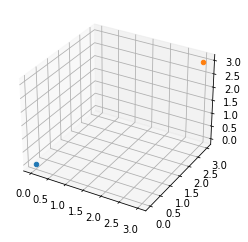

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(0, 0, 0)
ax.scatter(3, 3, 3)
plt.show()

4. Решить матричное уравнение `A*X*B=-C` - найти матрицу `X`. Где `A = [[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]`, `B=[[3, -1], [2, 1]]`, `C=[[7, 21], [11, 8], [8, 4]]`.

In [6]:
a = np.mat([[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]])
b = np.mat([[3, -1], [2, 1]])
c = np.mat([[7, 21], [11, 8], [8, 4]])
a = a **(-1)
b = b **(-1)
c -= c
print(a, b, c)

[[ 0.2 -0.4 -0. ]
 [-0.6  2.2 -2. ]
 [ 0.6 -1.2  1. ]] [[ 0.2  0.2]
 [-0.4  0.6]] [[0 0]
 [0 0]
 [0 0]]


## Лабораторная работа №1

Замечание: при решении данных задач не подразумевается использования циклов или генераторов Python, если в задании не сказано обратного. Решение должно опираться на использования функционала библиотеки `numpy`.

In [6]:
import numpy as np

1. Файл `minutes_n_ingredients.csv` содержит информацию об идентификаторе рецепта, времени его выполнения в минутах и количестве необходимых ингредиентов. Считайте данные из этого файла в виде массива `numpy` типа `int32`, используя `np.loadtxt`. Выведите на экран первые 5 строк массива.

In [7]:
mass = np.loadtxt('minutes_n_ingredients.csv', skiprows=1, delimiter=',', dtype='int32')
mass[0:5, :]

array([[127244,     60,     16],
       [ 23891,     25,      7],
       [ 94746,     10,      6],
       [ 67660,      5,      6],
       [157911,     60,     14]], dtype=int32)

2. Вычислите среднее значение, минимум, максимум и медиану по каждому из столбцов, кроме первого.

In [8]:
mass_2 = mass[:, 1:]
print('Среднее значение:', np.mean(mass_2, axis=0))
print('Минимум:', np.argmin(mass_2, axis=0))
print('Максимум:', np.argmax(mass_2, axis=0))
print('Медиана:', np.median(mass_2, axis=0))

Среднее значение: [2.16010017e+04 9.05528000e+00]
Минимум: [  411 13006]
Максимум: [15653 36140]
Медиана: [40.  9.]


3. Ограничьте сверху значения продолжительности выполнения рецепта значением квантиля $q_{0.75}$. 

In [49]:
mass[:, 1] = np.clip(mass[:, 1], 0, np.quantile(mass[:, 1], 0.75))
mass

array([[127244,     60,     16],
       [ 23891,     25,      7],
       [ 94746,     10,      6],
       ...,
       [498432,     65,     15],
       [370915,      5,      4],
       [ 81993,     65,     14]], dtype=int32)

4. Посчитайте, для скольких рецептов указана продолжительность, равная нулю. Замените для таких строк значение в данном столбце на 1.

In [71]:
print(len(mass[mass[:, 1] == 0]))
mass[mass[:, 1] == 0] == 1

479


array([[False, False, False],
       [False, False, False],
       [False, False, False],
       ...,
       [False, False, False],
       [False, False, False],
       [False, False, False]])

5. Посчитайте, сколько уникальных рецептов находится в датасете.

In [51]:
print(len(np.unique(mass[:, 0])))

100000


6. Сколько и каких различных значений кол-ва ингредиентов присутвует в рецептах из датасета?

In [53]:
print(len(set(mass[:, 2])))

37


7. Создайте версию массива, содержащую информацию только о рецептах, состоящих не более чем из 5 ингредиентов.

In [54]:
mass_2 = mass[mass[:, 2] <= 5]
mass_2

array([[446597,     15,      5],
       [204134,      5,      3],
       [ 25623,      6,      4],
       ...,
       [ 52088,     60,      5],
       [128811,     15,      4],
       [370915,      5,      4]], dtype=int32)

8. Для каждого рецепта посчитайте, сколько в среднем ингредиентов приходится на одну минуту рецепта. Найдите максимальное значение этой величины для всего датасета

In [62]:
result = mass[:, 2] / mass[:, 1]
print(result.max(axis=0))

inf


/var/folders/j2/hf2kgmfn4tg48_mn2h2lnms00000gn/T/ipykernel_81516/3898922557.py:1: RuntimeWarning: divide by zero encountered in true_divide
  result = mass[:, 2] / mass[:, 1]


9. Вычислите среднее количество ингредиентов для топ-100 рецептов с наибольшей продолжительностью

In [56]:
result = mass[mass[:, 1].argsort()[::-1]][:100]
np.mean(result[:, 2])

9.96

10. Выберите случайным образом и выведите информацию о 10 различных рецептах

In [55]:
result = np.random.randint(0, 100000, size=(1, 10))
print(mass[result])

[[[122762     25     10]
  [246985      6      6]
  [ 95429     30      8]
  [283404     37     13]
  [126287     10      3]
  [ 55751     65      9]
  [249187     65      5]
  [ 87354     35      9]
  [175371     45      3]
  [108871     45      8]]]


11. Выведите процент рецептов, кол-во ингредиентов в которых меньше среднего.

In [58]:
result = mass[:, 2] <= np.mean(mass[:, 2])
len(mass[result, :]) / len(mass) * 100

58.802

12. Назовем "простым" такой рецепт, длительность выполнения которого не больше 20 минут и кол-во ингредиентов в котором не больше 5. Создайте версию датасета с дополнительным столбцом, значениями которого являются 1, если рецепт простой, и 0 в противном случае.

In [59]:
mass_3 = mass.copy()
simple = [1 if (row[1] <= 20) & (row[2] <= 5) else 0 for row in mass_3]
res = np.insert(mass_3, 3, simple, axis=1)
res

array([[127244,     60,     16,      0],
       [ 23891,     25,      7,      0],
       [ 94746,     10,      6,      0],
       ...,
       [498432,     65,     15,      0],
       [370915,      5,      4,      1],
       [ 81993,     65,     14,      0]], dtype=int32)

13. Выведите процент "простых" рецептов в датасете

In [61]:
len(res[(res[:, 3] == 1)]) / len(mass) * 100

9.552

14. Разделим рецепты на группы по следующему правилу. Назовем рецепты короткими, если их продолжительность составляет менее 10 минут; стандартными, если их продолжительность составляет более 10, но менее 20 минут; и длинными, если их продолжительность составляет не менее 20 минут. Создайте трехмерный массив, где нулевая ось отвечает за номер группы (короткий, стандартный или длинный рецепт), первая ось - за сам рецепт и вторая ось - за характеристики рецепта. Выберите максимальное количество рецептов из каждой группы таким образом, чтобы было возможно сформировать трехмерный массив. Выведите форму полученного массива.